In [1]:
# importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the csv file
df=pd.read_csv(r"C:\Users\bhagy\Desktop\Wine prediction.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#checking the missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
#checking the no. of rows and columns
df.shape

(1143, 13)

#                 Data Analysis

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


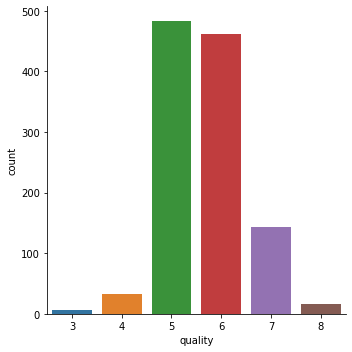

In [7]:
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

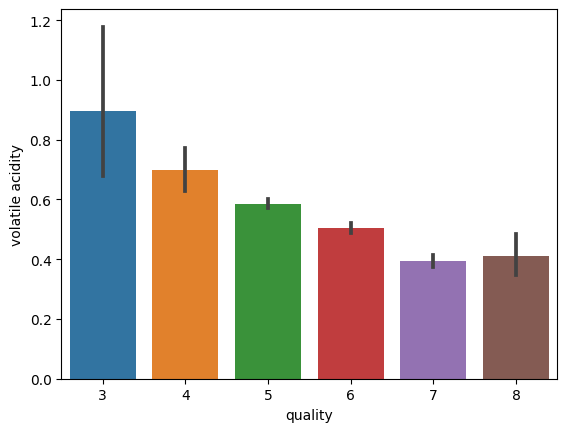

In [8]:
sns.barplot(x='quality',y='volatile acidity',data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

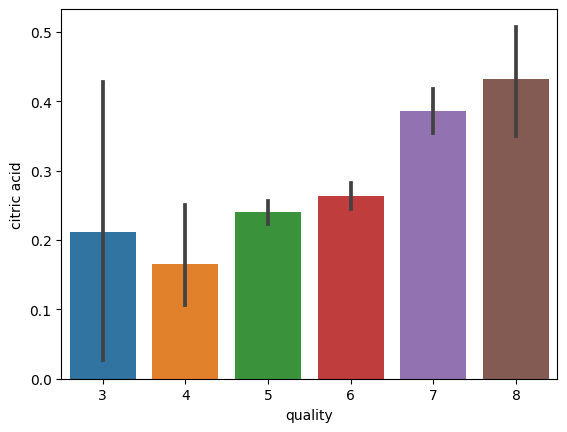

In [9]:
# Quality Vs Citric acid
sns.barplot(x='quality',y='citric acid',data=df)

In [10]:
#Data Preprocessing
x=df.drop('quality',axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [11]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
#Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 3)

In [15]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
664,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.500000,941
878,7.5,0.610,0.20,1.7,0.076,36.0,60.0,0.99494,3.10,0.40,9.300000,1240
130,7.2,0.730,0.02,2.5,0.076,16.0,42.0,0.99720,3.44,0.52,9.300000,182
967,8.3,0.850,0.14,2.5,0.093,13.0,54.0,0.99724,3.36,0.54,10.100000,1361
445,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.99640,3.21,0.61,9.300000,629
...,...,...,...,...,...,...,...,...,...,...,...,...
1021,6.1,0.400,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.100000,1433
789,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.300000,1116
256,8.6,0.450,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.900000,361
968,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,1362


In [16]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
1090,7.9,0.29,0.49,2.20,0.096,21.0,59.0,0.99714,3.31,0.67,10.1,1528
956,11.5,0.42,0.48,2.60,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1344
317,11.9,0.39,0.69,2.80,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,450
591,7.1,0.48,0.28,2.80,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,824
729,8.7,0.41,0.41,6.20,0.078,25.0,42.0,0.99530,3.24,0.77,12.6,1038
...,...,...,...,...,...,...,...,...,...,...,...,...
232,11.6,0.53,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5,326
1007,6.2,0.58,0.00,1.60,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,1415
950,6.0,0.50,0.00,1.40,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,1337
81,9.4,0.40,0.31,2.20,0.090,13.0,62.0,0.99660,3.07,0.63,10.5,115


In [17]:
y_train

664     1
878     0
130     0
967     0
445     0
       ..
1021    1
789     0
256     0
968     0
952     0
Name: quality, Length: 914, dtype: int64

# RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
#Accuracy Score
y_pred= rfc.predict(x_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [27]:
print('Accuracy: ', test_data_accuracy)


Accuracy:  0.9213973799126638


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.21590432818142863
Mean Squared Error: 0.09711832441222082
Root Mean Squared Error: 0.31163813054923306
R-squared: 0.2982940134332773


# RandomForestClassifier gives the best accuracy score